<a href="https://colab.research.google.com/github/Markuspg1/machine-learning1/blob/main/machine_learning_spanish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje Automatico
# Árboles y random forest para regresión y clasificación

Preparar nuestro ambiente asegurandonos que tengamos las siguientes librerias



In [ ]:
conda create --name ML-core python=3.9
conda activate ML-core
conda install scikit-learn matplotlib numpy pandas jupyter    

SyntaxError: ignored

El segundo paso es cargar el data set a nuestro dataframe desde
https://www.dropbox.com/s/pt7cskgwnzu80tc/housing_test.csv?dl=0

Creamos la funcion

In [ ]:
def load_csv(fn):
    
    import pandas as pd
    
    print("Cargando datos desde ", fn, end=" ...")
    df = pd.read_csv(fn)
    print("Completado.")
    print("Filas y Columnas: ", df.shape) #muestra el numero de filas y columnas
    print("Columnas\n", df.columns)
    print()
    print("df.columns.values.tolist()\n", df.columns.values.tolist()) #convierte las columnas en una lista
    
    return df

print("Funcion Definida")

Funcion Definida


Y luego la llamamos para mostrar los resultados

In [ ]:
print("\nProbando la funcion\n")
import pandas as pd

url = "https://dl.dropboxusercontent.com/s/pt7cskgwnzu80tc/"
fn  = "housing_test.csv"

df = load_csv(url + fn)
print("\nConfirmando Carga, df.shape", df.shape)
print("\nDone.")


Probando la funcion

Cargando datos desde  https://dl.dropboxusercontent.com/s/pt7cskgwnzu80tc/housing_test.csv ...Completado.
Filas y Columnas:  (1459, 80)
Columnas
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', '

Eliminamos la columna ID

In [ ]:
cols_to_drop = ['Id']
df = df.drop(cols_to_drop, axis=1)
print(df.shape)
print("df.columns.values.tolist()", df.columns.values.tolist())

print("\nCompleto.")

(1459, 79)
df.columns.values.tolist() ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'Sc

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

Eliminamos las columnas con valores duplicados y todas las columnas que tienen un mismo valor, ya que estas no nos funcionan para categorizar ni predecir.

Creamos la funcion

In [ ]:
def clean_data(df, v:bool=False):
        
    """
        Recibe el dataframe, verifica que las columnas no sean duplicadas ni tengan solo un valor.
        v: es una variable para habilitar/deshabilitar comentarios
    """
    
    print("Limpiando la data...")
    
    if v: print("  Eliminando Columnas Duplicadas. in/out resultado:", df.shape, end=" / ")
    
    df = df.T.drop_duplicates().T
    if v: print(df.shape, "Completo.")
    
    if v: print("  Eliminando columnas con un solo valor. in/out resultado:", df.shape, end=" / ")    
    df = df[df.columns[df.nunique() > 1]]
    if v: print(df.shape, "Completo.")
    
    return df

print("Function Defined\n")

Function Defined



Probamos la funcion

In [ ]:
import pandas as pd
import numpy as np

df = clean_data(df, v=True)

print("\nForma Final", df.shape)
print("\nCompleto.")

Limpiando la data...
  Eliminando Columnas Duplicadas. in/out resultado: (1459, 79) / (1459, 79) Completo.
  Eliminando columnas con un solo valor. in/out resultado: (1459, 79) / (1459, 78) Completo.

Forma Final (1459, 78)

Completo.


Analizamos los datos estadisticos de las columnas de tipo numerico.

In [ ]:
df.describe() #resumen de un conjunto de datos

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1459,1455,1232.0,1459,1459,107,1459,1459,1459,1459,...,1459,1459,3,290,51,1459,1459,1459,1458,1459
unique,16,5,115.0,1106,2,2,4,4,5,3,...,75,7,2,4,3,26,12,5,9,6
top,20,RL,60.0,9600,Pave,Grvl,Reg,Lvl,Inside,Gtl,...,0,0,Ex,MnPrv,Shed,0,6,2007,WD,Normal
freq,543,1114,133.0,20,1453,70,934,1311,1081,1396,...,1319,1453,2,172,46,1408,250,363,1258,1204


Columnas con nulos



In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1459 non-null   object
 1   MSZoning       1455 non-null   object
 2   LotFrontage    1232 non-null   object
 3   LotArea        1459 non-null   object
 4   Street         1459 non-null   object
 5   Alley          107 non-null    object
 6   LotShape       1459 non-null   object
 7   LandContour    1459 non-null   object
 8   LotConfig      1459 non-null   object
 9   LandSlope      1459 non-null   object
 10  Neighborhood   1459 non-null   object
 11  Condition1     1459 non-null   object
 12  Condition2     1459 non-null   object
 13  BldgType       1459 non-null   object
 14  HouseStyle     1459 non-null   object
 15  OverallQual    1459 non-null   object
 16  OverallCond    1459 non-null   object
 17  YearBuilt      1459 non-null   object
 18  YearRemodAdd   1459 non-null

In [ ]:
df.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 78, dtype: int64

Librerias para graficos

In [ ]:
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt

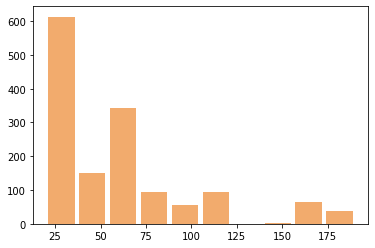


Unicos.


array([20, 60, 120, 160, 80, 30, 50, 90, 85, 190, 45, 70, 75, 180, 40,
       150], dtype=object)

In [ ]:
plt.hist(x=df['MSSubClass'], color='#F2AB6D', rwidth=0.85)
plt.show()

print("\nUnicos.")
df.MSSubClass.unique()



In [ ]:
print("\nConteo.")
df.MSSubClass.value_counts()




Conteo.


20     543
60     276
50     143
120     95
30      70
70      68
160     65
80      60
90      57
190     31
85      28
75       7
180      7
45       6
40       2
150      1
Name: MSSubClass, dtype: int64

In [ ]:
print("\Descrito.")
df.MSSubClass.describe() #datos estadisticos minimos

\Descrito.


count     1459
unique      16
top         20
freq       543
Name: MSSubClass, dtype: int64

In [ ]:
df.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1459,1455,1232.0,1459,1459,107,1459,1459,1459,1459,...,1459,1459,3,290,51,1459,1459,1459,1458,1459
unique,16,5,115.0,1106,2,2,4,4,5,3,...,75,7,2,4,3,26,12,5,9,6
top,20,RL,60.0,9600,Pave,Grvl,Reg,Lvl,Inside,Gtl,...,0,0,Ex,MnPrv,Shed,0,6,2007,WD,Normal
freq,543,1114,133.0,20,1453,70,934,1311,1081,1396,...,1319,1453,2,172,46,1408,250,363,1258,1204


In [ ]:
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,Inside,Gtl,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,Corner,Gtl,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,Inside,Gtl,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,Inside,Gtl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,Inside,Gtl,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


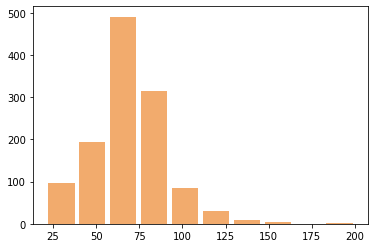

array([80.0, 81.0, 74.0, 78.0, 43.0, 75.0, nan, 63.0, 85.0, 70.0, 26.0,
       21.0, 24.0, 102.0, 94.0, 90.0, 79.0, 110.0, 105.0, 41.0, 100.0,
       67.0, 60.0, 73.0, 92.0, 84.0, 39.0, 88.0, 25.0, 30.0, 57.0, 68.0,
       98.0, 120.0, 87.0, 119.0, 65.0, 56.0, 69.0, 50.0, 53.0, 52.0, 51.0,
       72.0, 86.0, 124.0, 44.0, 83.0, 64.0, 82.0, 38.0, 89.0, 35.0, 58.0,
       66.0, 93.0, 31.0, 76.0, 28.0, 61.0, 95.0, 129.0, 59.0, 77.0, 96.0,
       47.0, 34.0, 117.0, 48.0, 62.0, 42.0, 106.0, 112.0, 32.0, 115.0,
       71.0, 45.0, 109.0, 113.0, 125.0, 101.0, 104.0, 108.0, 130.0, 135.0,
       36.0, 55.0, 136.0, 97.0, 91.0, 37.0, 22.0, 103.0, 99.0, 40.0,
       123.0, 54.0, 107.0, 150.0, 160.0, 195.0, 128.0, 33.0, 118.0, 134.0,
       155.0, 126.0, 46.0, 149.0, 200.0, 121.0, 131.0, 114.0, 49.0, 133.0,
       140.0], dtype=object)

In [ ]:
plt.hist(x=df['LotFrontage'], color='#F2AB6D', rwidth=0.85)
plt.show()

df.LotFrontage.unique()

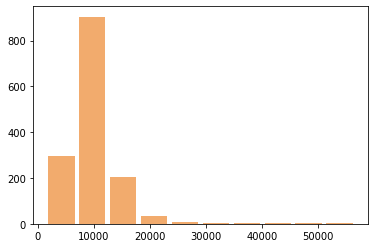

In [ ]:
plt.hist(x=df['LotArea'], color='#F2AB6D', rwidth=0.85)
plt.show()

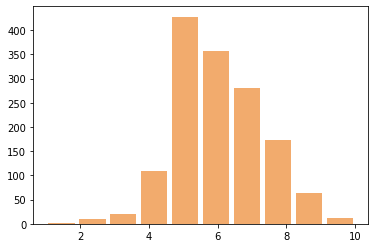

In [ ]:
plt.hist(x=df['OverallQual'], color='#F2AB6D', rwidth=0.85)
plt.show()

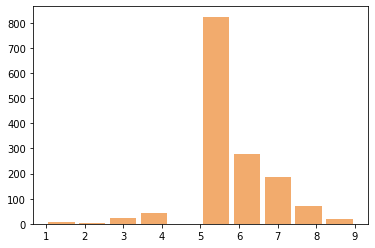

In [ ]:
plt.hist(x=df['OverallCond'], color='#F2AB6D', rwidth=0.85)
plt.show()

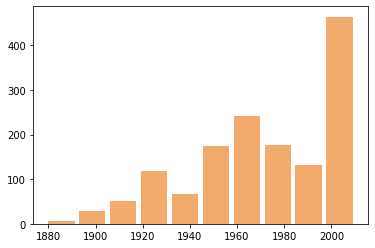

In [ ]:
plt.hist(x=df['YearBuilt'], color='#F2AB6D', rwidth=0.85)
plt.show()

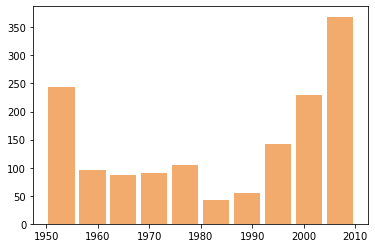

In [ ]:
plt.hist(x=df['YearRemodAdd'], color='#F2AB6D', rwidth=0.85)
plt.show()

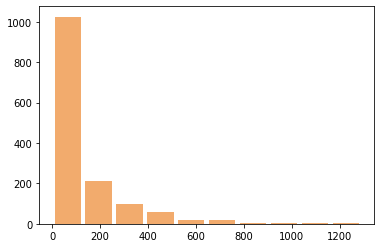

In [ ]:
plt.hist(x=df['MasVnrArea'], color='#F2AB6D', rwidth=0.85)
plt.show()

# Correlacion entre valores

In [ ]:
corrTrain = df.corr()

NameError: ignored

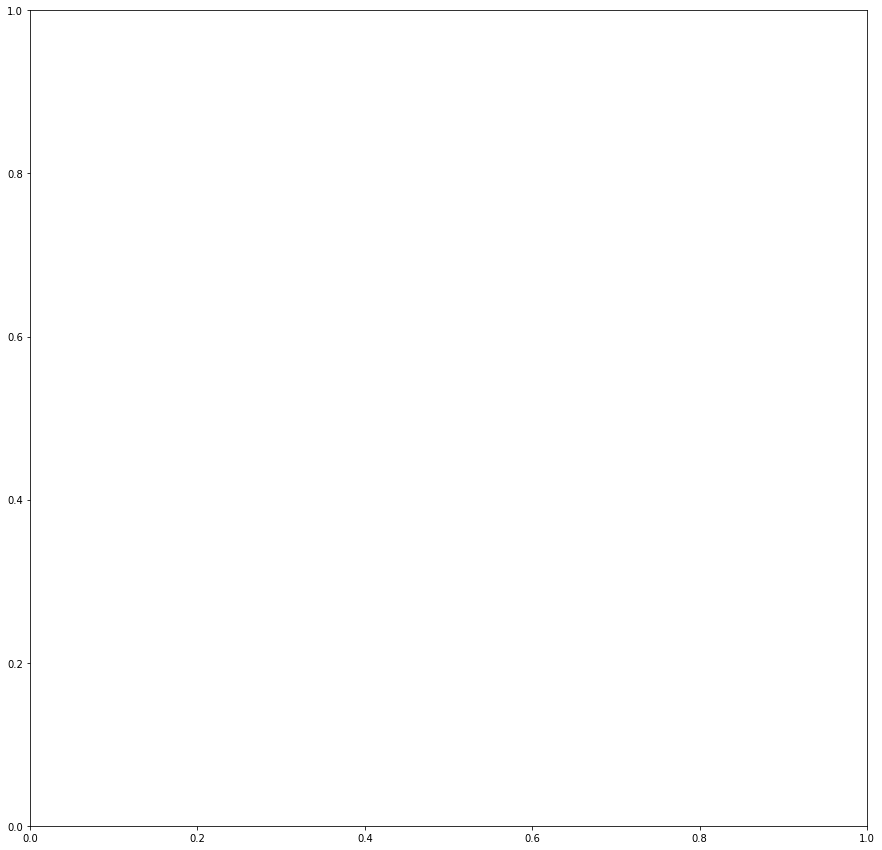

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrTrain,square=True)
plt.show()

# Rellenado de columnas